In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2023-01-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2023_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-01-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",9675,사하구,10425,사하구,750,7.75%,"10,050"
1,2023-01-12,간장,오복왕표 0.9ℓ 1병,7990,사하구,8351,사하구,361,4.52%,"8,171"
2,2023-01-12,갈치,60cm정도 500g 1마리(냉동),11980,사하구,12900,사하구,920,7.68%,"12,440"
3,2023-01-12,고등어,30㎝정도 500g 1마리,4400,사하구,5990,사하구,1590,36.14%,"5,195"
4,2023-01-12,달걀,오경슈퍼란60g정도 10개,3990,사하구,4290,사하구,300,7.52%,"4,140"
5,2023-01-12,닭고기,육계 1.0㎏,7590,사하구,11900,사하구,4310,56.79%,"9,745"
6,2023-01-12,대파,1.0㎏,4842,사하구,4983,사하구,141,2.91%,"4,913"
7,2023-01-12,돼지고기,삼겹살 500g,10950,사하구,11450,사하구,500,4.57%,"11,200"
8,2023-01-12,두부,500g 판두부(국산포장두부 420g) 1모,5194,사하구,5294,사하구,100,1.93%,"5,244"
9,2023-01-12,라면,신라면 120g 1봉지,818,사하구,820,사하구,2,0.24%,819


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2023-04-13"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2023_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-04-13,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8925,사하구,10425,사하구,1500,16.81%,"9,675"
1,2023-04-13,간장,오복왕표 0.9ℓ 1병,7990,사하구,8351,사하구,361,4.52%,"8,171"
2,2023-04-13,갈치,60cm정도 500g 1마리(냉동),9900,사하구,9900,사하구,0,0.0%,"9,900"
3,2023-04-13,달걀,오경슈퍼란60g정도 10개,2990,사하구,3990,사하구,1000,33.44%,"3,490"
4,2023-04-13,닭고기,육계 1.0㎏,8250,사하구,8590,사하구,340,4.12%,"8,420"
5,2023-04-13,대파,1.0㎏,3985,사하구,4316,사하구,331,8.31%,"4,151"
6,2023-04-13,돼지고기,삼겹살 500g,9950,사하구,9950,사하구,0,0.0%,"9,950"
7,2023-04-13,두부,500g 판두부(국산포장두부 420g) 1모,5194,사하구,5294,사하구,100,1.93%,"5,244"
8,2023-04-13,라면,신라면 120g 1봉지,820,사하구,838,사하구,18,2.2%,829
9,2023-04-13,맥주,하이트 500㎖ 1병,1580,사하구,1690,사하구,110,6.96%,"1,635"


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2023-07-13"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2023_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-07-13,가루비누,"세탁용세제(LG테크),가루형,3.0kg",10425,사하구,17925,사하구,7500,71.94%,"14,175"
1,2023-07-13,간장,오복왕표 0.9ℓ 1병,7990,사하구,8351,사하구,361,4.52%,"8,171"
2,2023-07-13,갈치,60cm정도 500g 1마리(냉동),7990,사하구,9900,사하구,1910,23.9%,"8,945"
3,2023-07-13,고등어,30㎝정도 500g 1마리,4983,사하구,5990,사하구,1007,20.21%,"5,487"
4,2023-07-13,달걀,오경슈퍼란60g정도 10개,3327,사하구,3990,사하구,663,19.93%,"3,659"
5,2023-07-13,닭고기,육계 1.0㎏,6990,사하구,10990,사하구,4000,57.22%,"8,990"
6,2023-07-13,대파,1.0㎏,2500,사하구,4271,사하구,1771,70.84%,"3,386"
7,2023-07-13,돼지고기,삼겹살 500g,9950,사하구,13450,사하구,3500,35.18%,"11,700"
8,2023-07-13,두부,500g 판두부(국산포장두부 420g) 1모,5294,사하구,5670,사하구,376,7.1%,"5,482"
9,2023-07-13,라면,신라면 120g 1봉지,780,사하구,798,사하구,18,2.31%,789


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2023-10-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2023_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-10-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6553,사하구,7425,사하구,872,13.31%,"6,989"
1,2023-10-12,간장,오복왕표 0.9ℓ 1병,7990,사하구,8351,사하구,361,4.52%,"8,171"
2,2023-10-12,갈치,60cm정도 500g 1마리(냉동),9400,사하구,9900,사하구,500,5.32%,"9,650"
3,2023-10-12,고등어,30㎝정도 500g 1마리,4987,사하구,5990,사하구,1003,20.11%,"5,489"
4,2023-10-12,달걀,오경슈퍼란60g정도 10개,3990,사하구,3990,사하구,0,0.0%,"3,990"
5,2023-10-12,닭고기,육계 1.0㎏,6990,사하구,10990,사하구,4000,57.22%,"8,990"
6,2023-10-12,대파,1.0㎏,3333,사하구,4487,사하구,1154,34.62%,"3,910"
7,2023-10-12,돼지고기,삼겹살 500g,10450,사하구,14450,사하구,4000,38.28%,"12,450"
8,2023-10-12,두부,500g 판두부(국산포장두부 420g) 1모,5194,사하구,5670,사하구,476,9.16%,"5,432"
9,2023-10-12,라면,신라면 120g 1봉지,780,사하구,798,사하구,18,2.31%,789


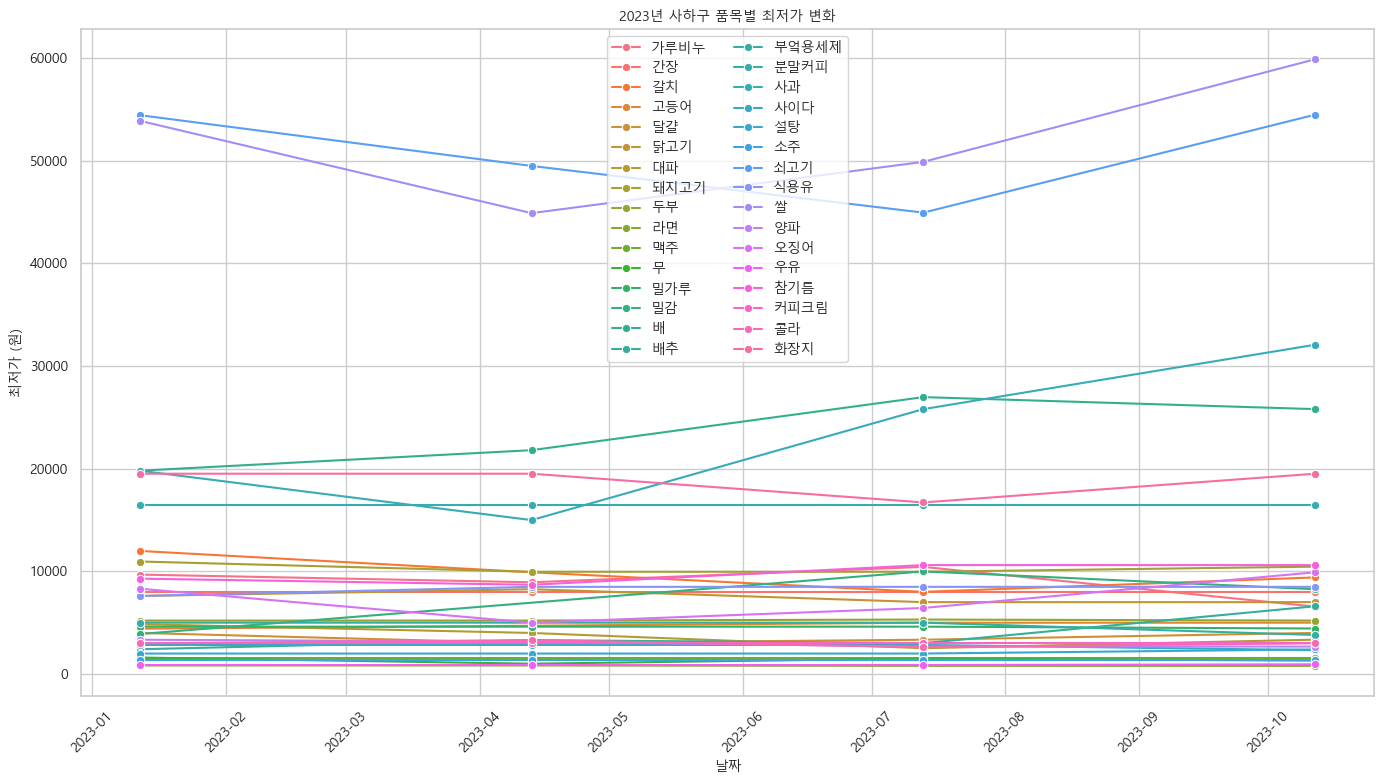

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2023_1q.csv")
q2 = pd.read_csv("사하구2023_2q.csv")
q3 = pd.read_csv("사하구2023_3q.csv")
q4 = pd.read_csv("사하구2023_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2023년 사하구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사하구2023_min.csv", index=False, encoding="utf-8-sig")

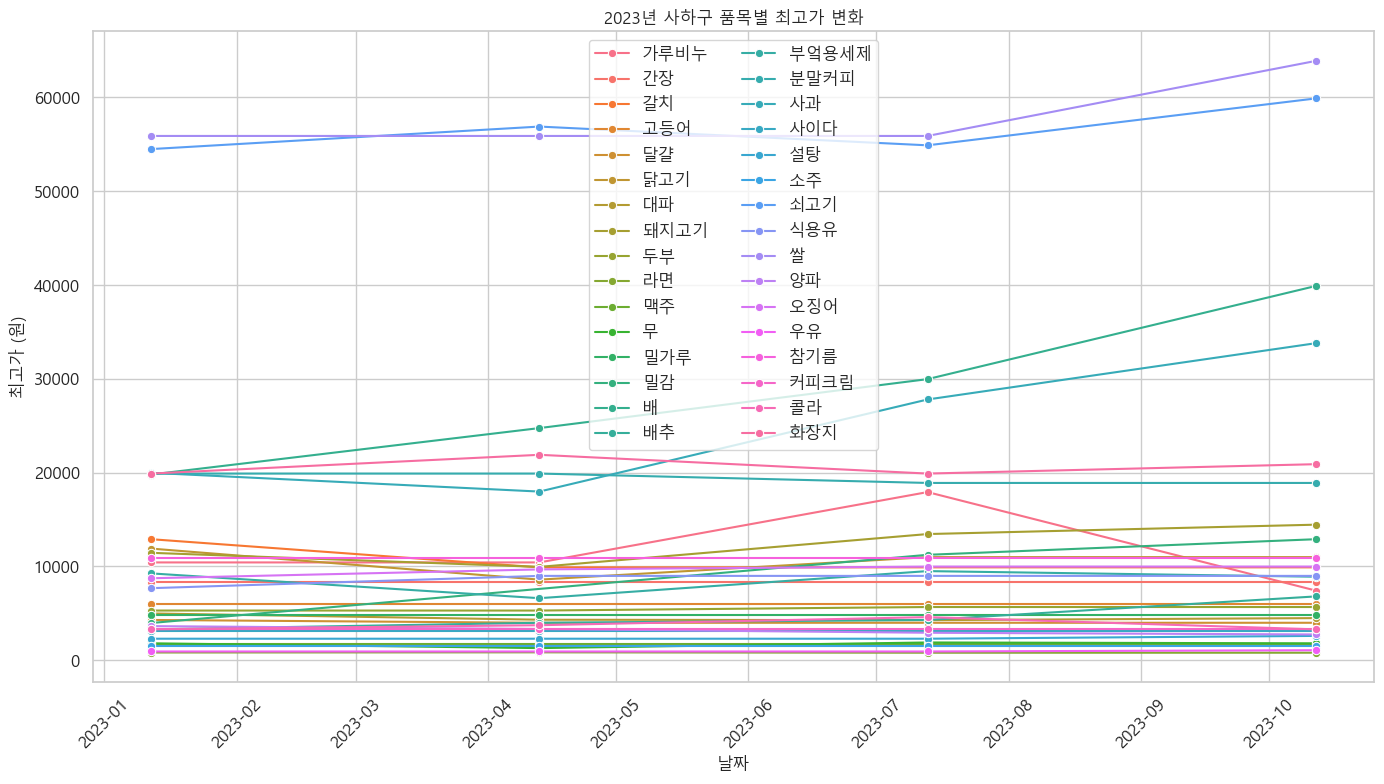

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2023_1q.csv")
q2 = pd.read_csv("사하구2023_2q.csv")
q3 = pd.read_csv("사하구2023_3q.csv")
q4 = pd.read_csv("사하구2023_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2023년 사하구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사하구2023_max.csv", index=False, encoding="utf-8-sig")